In [ ]:
#import pandas as pd
#pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

In [ ]:
import pandas as pd
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
X=df.iloc[:,0:13].values
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [ ]:
y=df.iloc[:,13].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
s_c=StandardScaler()
X_train=s_c.fit_transform(X_train)
X_test=s_c.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
!pip install scikit-learn-extra
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.3 MB/s eta 0:00:00


In [ ]:
#creating a function to get accuracy of each classification & regression model
from sklearn.metrics import accuracy_score
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    return model.score(X_train,y_train)*100

In [ ]:
#creating a function to get accuracy of each clustering model
from sklearn import metrics
from sklearn.metrics import rand_score
def get_score2(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.fit_predict(X_test)
    return metrics.rand_score(y_pred,y_test)*100

In [ ]:
scores_logistic=[]
scores_svm=[]
scores_knn=[]
scores_rf=[]
scores_dt=[]
scores_linear=[]
scores_kmean=[]
scores_kmedoid=[]
scores_heirarchical=[]

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=2)

In [ ]:

for train_index,test_index in folds.split(X,y):
    X_train,X_test,y_train,y_test=X[train_index],X[test_index],y[train_index],y[test_index]
    scores_logistic.append(get_score(LogisticRegression(max_iter=5000),X_train,X_test,y_train,y_test))
    scores_svm.append(get_score(SVC(kernel='linear'),X_train,X_test,y_train,y_test))
    scores_knn.append(get_score(KNeighborsClassifier(n_neighbors=5),X_train,X_test,y_train,y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=100),X_train,X_test,y_train,y_test))
    scores_dt.append(get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test))
    scores_linear.append(get_score(LinearRegression(),X_train,X_test,y_train,y_test))
    scores_kmean.append(get_score2(KMeans(n_clusters=7),X_train,X_test,y_train,y_test))
    scores_kmedoid.append(get_score2(KMedoids(n_clusters=7),X_train,X_test,y_train,y_test))
    scores_heirarchical.append(get_score2(AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward'),X_train,X_test,y_train,y_test))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarnin

In [ ]:
print(scores_logistic[1])

89.27875243664717


In [ ]:
print(scores_svm[1])

89.8635477582846


In [ ]:
print(scores_knn[1])

84.7953216374269


In [ ]:
print(scores_rf[1])

100.0


In [ ]:
print(scores_dt[1])

100.0


In [ ]:
print(scores_linear[1])

57.193067484841094


In [ ]:
print(scores_kmean[1])

51.66493395303326


In [ ]:
print(scores_kmedoid[1])

51.40732020547946


In [ ]:
print(scores_heirarchical[1])

50.588613013698634


In [ ]:
print(scores_logistic[1])
print(scores_svm[1])
print(scores_knn[1])
print(scores_rf[1])
print(scores_dt[1])
print(scores_linear[1])
print(scores_kmean[1])
print(scores_kmedoid[1])
print(scores_heirarchical[1])

89.27875243664717
89.8635477582846
84.7953216374269
100.0
100.0
57.193067484841094
51.66493395303326
51.40732020547946
50.588613013698634


In [ ]:
acc=({'model':['Logistic','SVM','KNN','Random forest','Decision Tree','Linear Regression','K-means','K-medoid','Heirarchical'],'Accuracy':[scores_logistic[1],scores_svm[1],scores_knn[1],scores_rf[1],scores_dt[1],scores_linear[1],scores_kmean[1],scores_kmedoid[1],scores_heirarchical[1]]})
acc=pd.DataFrame(acc)
acc

,model,Accuracy
0,Logistic,89.278752
1,SVM,89.863548
2,KNN,84.795322
3,Random forest,100.000000
4,Decision Tree,100.000000
5,Linear Regression,57.193067
6,K-means,51.664934
7,K-medoid,51.407320
8,Heirarchical,50.588613


([<matplotlib.axis.XTick at 0x7efd96513f40>,
 [Text(0.0, 0, 'Logistic'),
  Text(1.0, 0, 'SVM'),
  Text(2.0, 0, 'KNN'),
  Text(3.0, 0, 'Random forest'),
  Text(4.0, 0, 'Decision Tree'),
  Text(5.0, 0, 'Linear Regression'),
  Text(6.0, 0, 'K-means'),
  Text(7.0, 0, 'K-medoid'),
  Text(8.0, 0, 'Heirarchical')])

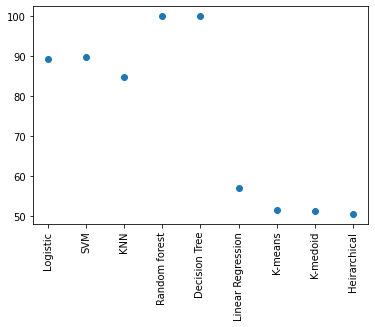

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(acc['model'],acc['Accuracy'])
plt.xticks(acc['model'],acc['model'], rotation ='vertical')

([<matplotlib.axis.XTick at 0x7efd96639ca0>,
 [Text(0.0, 0, 'Logistic'),
  Text(1.0, 0, 'SVM'),
  Text(2.0, 0, 'KNN'),
  Text(3.0, 0, 'Random forest'),
  Text(4.0, 0, 'Decision Tree'),
  Text(5.0, 0, 'Linear Regression'),
  Text(6.0, 0, 'K-means'),
  Text(7.0, 0, 'K-medoid'),
  Text(8.0, 0, 'Heirarchical')])

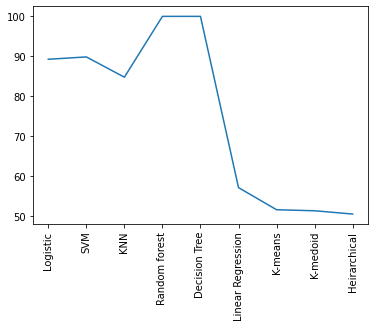

In [ ]:
plt.plot(acc['model'],acc['Accuracy'])
plt.xticks(acc['model'],acc['model'], rotation ='vertical')

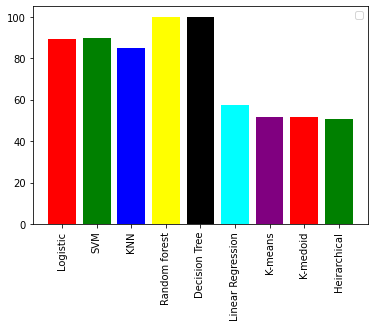

In [ ]:
plt.bar(acc['model'],acc['Accuracy'],color=['red','green','blue','yellow','black','cyan','purple'])
plt.legend(loc=1)
plt.xticks(acc['model'],acc['model'], rotation ='vertical')
plt.show()